In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### NCAA.com

In [19]:
# read in csv
df = pd.read_csv('../Resources/combined_stats.csv')
df

,Team,GP,PTS,PPG,AST,TO,AST/TO,APG,Bench,Bench_PPG,...,OPP_3FG%,3PG,TO_RATIO,OPP TO,AVG_FCD_TO,TO.1,TOPG,W,L,Pct
0,Gonzaga,37,3187,86.1,602,397,1.52,16.3,769,20.78,...,34.9,7.5,2.5,489,13.22,397,10.7,31,6,83.8
1,Toledo,35,2989,85.4,521,336,1.55,14.9,534,15.26,...,36.6,8.6,3.3,452,12.91,336,9.6,27,8,77.1
2,Oral Roberts,35,2915,83.3,514,329,1.56,14.7,693,19.80,...,34.7,10.7,3.3,445,12.71,329,9.4,30,5,85.7
3,Southern Utah,37,3064,82.8,485,492,0.99,13.1,783,21.16,...,34.7,8.5,0.9,527,14.24,492,13.3,24,13,64.9
4,Youngstown St.,34,2785,81.9,521,376,1.39,15.3,639,18.79,...,34.1,8.0,1.8,438,12.88,376,11.1,24,10,70.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Cal Poly,33,2006,60.8,341,457,0.75,10.3,627,19.00,...,34.1,5.5,-1.5,408,12.36,457,13.8,8,25,24.2
348,CSU Bakersfield,33,1995,60.5,355,424,0.84,10.8,462,14.00,...,34.2,4.3,0.6,445,13.48,424,12.8,11,22,33.3
349,Green Bay,32,1898,59.3,350,447,0.78,10.9,479,14.97,...,35.0,6.8,-3.3,342,10.69,447,14.0,3,29,9.4
350,Florida A&M,29,1700,58.6,280,464,0.60,9.7,616,21.24,...,33.3,5.8,-3.5,363,12.52,464,16.0,7,22,24.1


In [5]:
df.describe()

,GP,PTS,PPG,AST,TO,AST/TO,APG,Bench,Bench_PPG,BLKS,...,OPP_3FG%,3PG,TO_RATIO,OPP TO,AVG_FCD_TO,TO.1,TOPG,W,L,Pct
count,352.000000,352.00000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,32.892045,2360.18750,71.640909,434.440341,409.565341,1.071761,13.169602,624.278409,18.983665,106.659091,...,33.715057,7.365057,0.221307,417.931818,12.702642,409.565341,12.479261,17.184659,15.707386,51.600284
std,2.056120,260.93211,5.009186,71.712801,46.202900,0.201620,1.722455,154.895339,4.534521,32.380884,...,2.209234,1.241220,1.882011,65.067100,1.784616,46.202900,1.445495,6.314411,5.022134,16.790481
min,24.000000,1700.00000,58.300000,280.000000,281.000000,0.600000,9.300000,313.000000,9.480000,37.000000,...,26.500000,4.100000,-4.800000,277.000000,8.310000,281.000000,8.500000,3.000000,4.000000,9.400000
25%,32.000000,2178.75000,68.150000,382.000000,379.000000,0.930000,12.000000,506.750000,15.597500,84.000000,...,32.275000,6.575000,-1.100000,371.750000,11.520000,379.000000,11.600000,13.000000,12.000000,39.400000
50%,33.000000,2339.50000,71.450000,428.000000,405.000000,1.050000,13.050000,613.500000,18.770000,102.000000,...,33.700000,7.400000,0.200000,409.000000,12.465000,405.000000,12.300000,17.000000,16.000000,52.350000
75%,34.000000,2518.25000,75.300000,474.500000,437.000000,1.180000,14.300000,723.000000,22.007500,125.250000,...,35.100000,8.100000,1.400000,460.000000,13.755000,437.000000,13.400000,22.000000,19.000000,63.675000
max,39.000000,3187.00000,86.100000,705.000000,573.000000,1.840000,19.100000,1275.000000,34.740000,242.000000,...,40.800000,11.400000,5.800000,595.000000,19.000000,573.000000,17.100000,35.000000,29.000000,89.700000


In [15]:
def linreg(x,y,xlabel):
    from scipy.stats import linregress
    import matplotlib.pyplot as plt

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    
    regress_values = x*slope + intercept
    lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)
    plt.plot(x,regress_values,"red")
    
    plt.xlabel(xlabel)
    plt.ylabel('Win Percent')
    
    print(f"The r-value is: {rvalue}")
    print(f"{lin_eq}")

In [7]:

list1 = df.columns
list1 = list1.drop("Team")
list1 = list1.drop('Pct')

rval_df = pd.DataFrame(list1)
rval_df['r-value'] = " "
rval_df = rval_df.rename(columns = {0:'Category'})


In [8]:
for index, row in rval_df.iterrows():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[f"{list1[index]}"],
                                                            df['Pct'])
    
    rval_df.loc[index,'r-value'] = rvalue
rval_df.head()

,Category,r-value
0,GP,0.617447
1,PTS,0.737295
2,PPG,0.608366
3,AST,0.644959
4,TO,-0.064423


In [20]:
top_positive = rval_df.sort_values('r-value', ascending = False)
top_positive

,Category,r-value
53,W,0.987294
38,SCR MAR,0.924458
1,PTS,0.737295
14,FGM,0.709852
32,DRebs,0.671447
27,REB,0.654726
3,AST,0.644959
0,GP,0.617447
2,PPG,0.608366
5,AST/TO,0.596115


The r-value is: 0.671446922966825
y = 0.13x + -56.43


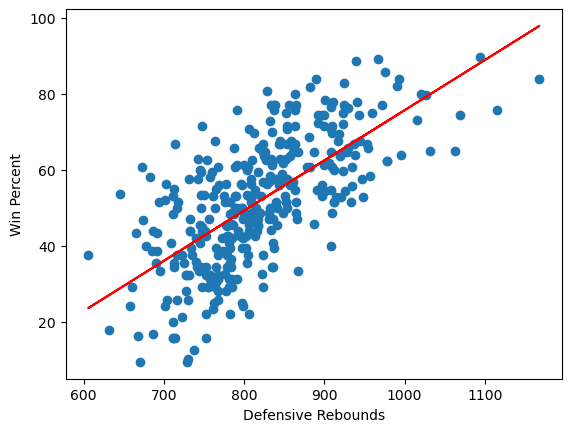

In [16]:
x = df[f"{list1[32]}"]
y = df['Pct']
linreg(x,y,'Defensive Rebounds')

In [17]:
top_negative = rval_df.sort_values('r-value', ascending = True)
top_negative.head()

,Category,r-value
54,L,-0.988551
19,OPP FG%,-0.622504
37,OPP PPG,-0.514071
46,OPP_3FG%,-0.47453
52,TOPG,-0.395371


The r-value is: -0.47452985398141356
y = -3.61x + 173.19


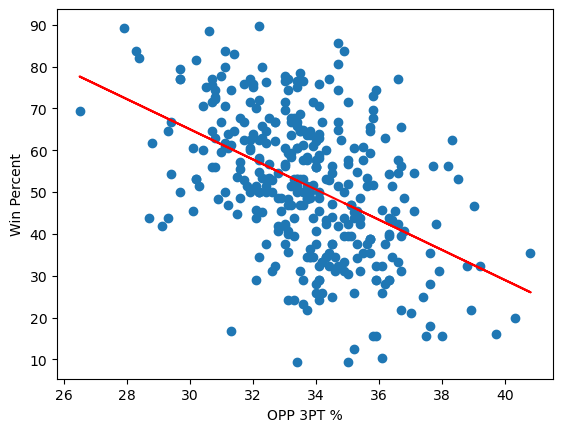

In [18]:
x = df[f"{list1[46]}"]
y = df['Pct']
linreg(x,y,'OPP 3PT %')

### TeamRanking.com

In [8]:
import pandas as pd

In [151]:
df = pd.read_csv('../Resources/TeamRankings/Defensive-Rebounds-per-Game_1997_2022.csv')

def_rebounds = df.drop(columns = ['Unnamed: 0'])
def_rebounds.head()

,Team,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Kansas,25.9,25.0,25.8,27.3,27.7,24.4,25.5,24.5,24.3,...,25.2,24.7,26.0,25.5,24.4,26.2,26.6,24.6,25.7,24.6
1,Stanford,25.1,25.1,27.3,24.6,26.2,23.7,24.3,21.7,21.4,...,23.3,23.7,21.3,22.2,26.0,25.4,23.8,24.2,24.1,22.8
2,Kentucky,25.0,23.2,22.6,23.2,22.7,22.0,22.8,21.7,21.7,...,24.3,24.1,24.5,25.7,25.7,25.9,25.6,24.5,25.4,24.6
3,Montana St,24.9,24.4,21.1,19.3,18.8,20.0,21.0,23.3,21.9,...,20.2,21.2,23.5,23.8,23.1,22.6,25.7,22.6,24.3,21.7
4,Maryland,24.8,24.4,23.4,24.6,26.0,25.1,24.1,26.4,23.1,...,23.4,24.4,25.0,23.3,24.7,26.5,26.2,24.2,24.6,22.3


In [128]:
df = pd.read_csv('../Resources/TeamRankings/win-pct-all-games_1997_2022.csv')

win_perc = df.drop(columns = ['Unnamed: 0'])
win_perc.head()

,Team,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Princeton,0.929,0.724,0.593,0.577,0.556,0.577,0.704,0.519,0.462,...,0.690,0.517,0.750,0.759,0.429,0.539,0.500,--,0.750,0.700
1,Kentucky,0.897,0.757,0.719,0.706,0.677,0.889,0.844,0.824,0.629,...,0.737,0.974,0.750,0.842,0.703,0.811,0.807,0.360,0.765,0.647
2,Kansas,0.895,0.688,0.697,0.774,0.886,0.794,0.719,0.767,0.750,...,0.714,0.750,0.865,0.861,0.795,0.722,0.900,0.690,0.850,0.778
3,N Carolina,0.895,0.706,0.611,0.788,0.286,0.543,0.633,0.892,0.742,...,0.706,0.684,0.825,0.821,0.703,0.806,0.424,0.621,0.744,0.606
4,Duke,0.886,0.949,0.853,0.897,0.886,0.788,0.838,0.818,0.889,...,0.743,0.895,0.694,0.757,0.784,0.842,0.807,0.542,0.821,0.750


In [129]:
win_perc = win_perc.set_index('Team').replace('--','0').astype(float)
win_perc = win_perc.fillna(0)

summary_stats = win_perc.T.describe()
summary_stats

Team,Princeton,Kentucky,Kansas,N Carolina,Duke,Utah,Murray St,Connecticut,Arizona,Stanford,...,Bellarmine,Tarleton State,Utah Tech,UC San Diego,St. Thomas,Queens,Stonehill,S Indiana,TX A&M-Com,Lindenwood
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.576231,0.747923,0.806577,0.713115,0.811731,0.586923,0.680692,0.692000,0.732231,0.626269,...,0.059692,0.044577,0.039077,0.037654,0.031038,0.019231,0.016654,0.016654,0.014423,0.010615
std,0.191944,0.134084,0.077333,0.153139,0.085163,0.171889,0.146543,0.136664,0.115362,0.152054,...,0.171121,0.126675,0.110586,0.108144,0.117019,0.098058,0.084918,0.084918,0.073544,0.054128
min,0.000000,0.360000,0.688000,0.286000,0.542000,0.167000,0.452000,0.438000,0.516000,0.424000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.504250,0.654500,0.750000,0.624000,0.785000,0.468000,0.558750,0.594250,0.654500,0.504750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.585000,0.753500,0.794500,0.724000,0.822500,0.585500,0.678000,0.697000,0.765000,0.584500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.703000,0.837500,0.867250,0.819750,0.870250,0.725000,0.811500,0.793000,0.808250,0.721000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.929000,0.974000,0.921000,0.947000,0.949000,0.879000,0.933000,0.944000,0.895000,0.938000,...,0.600000,0.433000,0.367000,0.407000,0.548000,0.500000,0.433000,0.433000,0.375000,0.276000


In [127]:
summary_stats.iloc[1].mean()

0.45022629937629904

In [59]:
final_four_win_prc = win_perc[(win_perc['Team'] == 'Connecticut') |
                      (win_perc['Team'] == 'San Diego St') |
                      (win_perc['Team'] == 'Miami (FL)') |
                      (win_perc['Team'] == 'Fla Atlantic')]
final_four_win_prc

,Team,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
7,Connecticut,0.865,0.944,0.714,0.613,0.794,0.697,0.842,0.742,0.882,...,0.790,0.571,0.694,0.469,0.438,0.485,0.613,0.652,0.697,0.795
72,Miami (FL),0.643,0.767,0.677,0.552,0.750,0.393,0.448,0.552,0.529,...,0.515,0.658,0.771,0.636,0.688,0.438,0.484,0.370,0.703,0.784
175,San Diego St,0.444,0.120,0.148,0.462,0.613,0.517,0.429,0.333,0.710,...,0.853,0.743,0.722,0.563,0.656,0.606,0.936,0.815,0.719,0.816
290,Fla Atlantic,0.192,0.200,0.035,0.241,0.600,0.222,0.269,0.370,0.536,...,0.267,0.259,0.226,0.286,0.321,0.467,0.483,0.474,0.516,0.892


In [ ]:
conn_win_pct = win_perc[win_perc['Team'] == 'Connecticut']
conn_win_pct#%%
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### NCAA.com

In [ ]:
# read in csv
df = pd.read_csv('../Resources/combined_stats.csv')
df

In [ ]:
df.describe()

In [ ]:
def linreg(x,y,xlabel):
    from scipy.stats import linregress
    import matplotlib.pyplot as plt

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

    regress_values = x*slope + intercept
    lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y)
    plt.plot(x,regress_values,"red")

    plt.xlabel(xlabel)
    plt.ylabel('Win Percent')

    print(f"The r-value is: {rvalue}")
    print(f"{lin_eq}")

In [ ]:

list1 = df.columns
list1 = list1.drop("Team")
list1 = list1.drop('Pct')

rval_df = pd.DataFrame(list1)
rval_df['r-value'] = " "
rval_df = rval_df.rename(columns = {0:'Category'})


In [ ]:
for index, row in rval_df.iterrows():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[f"{list1[index]}"],
                                                            df['Pct'])

    rval_df.loc[index,'r-value'] = rvalue
rval_df.head()

In [ ]:
top_positive = rval_df.sort_values('r-value', ascending = False)
top_positive

In [ ]:
x = df[f"{list1[32]}"]
y = df['Pct']
linreg(x,y,'Defensive Rebounds')

In [ ]:
top_negative = rval_df.sort_values('r-value', ascending = True)
top_negative.head()

In [ ]:
x = df[f"{list1[46]}"]
y = df['Pct']
linreg(x,y,'OPP 3PT %')

### TeamRanking.com

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('../Resources/TeamRankings/Defensive-Rebounds-per-Game_1997_2022.csv')

def_rebounds = df.drop(columns = ['Unnamed: 0'])
def_rebounds.head()

,Team,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Kansas,25.9,25.0,25.8,27.3,27.7,24.4,25.5,24.5,24.3,...,25.2,24.7,26.0,25.5,24.4,26.2,26.6,24.6,25.7,24.6
1,Stanford,25.1,25.1,27.3,24.6,26.2,23.7,24.3,21.7,21.4,...,23.3,23.7,21.3,22.2,26.0,25.4,23.8,24.2,24.1,22.8
2,Kentucky,25.0,23.2,22.6,23.2,22.7,22.0,22.8,21.7,21.7,...,24.3,24.1,24.5,25.7,25.7,25.9,25.6,24.5,25.4,24.6
3,Montana St,24.9,24.4,21.1,19.3,18.8,20.0,21.0,23.3,21.9,...,20.2,21.2,23.5,23.8,23.1,22.6,25.7,22.6,24.3,21.7
4,Maryland,24.8,24.4,23.4,24.6,26.0,25.1,24.1,26.4,23.1,...,23.4,24.4,25.0,23.3,24.7,26.5,26.2,24.2,24.6,22.3


In [ ]:
df = pd.read_csv('../Resources/TeamRankings/win-pct-all-games_1997_2022.csv')

win_perc = df.drop(columns = ['Unnamed: 0'])
win_perc.head()

In [ ]:
win_perc = win_perc.set_index('Team').replace('--','0').astype(float)
win_perc = win_perc.fillna(0)

summary_stats = win_perc.T.describe()
summary_stats

In [ ]:
summary_stats.iloc[1].mean()

In [12]:
final_four_win_prc = win_perc[(win_perc['Team'] == 'Connecticut') |
                      (win_perc['Team'] == 'San Diego St') |
                      (win_perc['Team'] == 'Miami (FL)') |
                      (win_perc['Team'] == 'Fla Atlantic')]
final_four_win_prc

,Team,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
7,Connecticut,0.865,0.944,0.714,0.613,0.794,0.697,0.842,0.742,0.882,...,0.790,0.571,0.694,0.469,0.438,0.485,0.613,0.652,0.697,0.795
72,Miami (FL),0.643,0.767,0.677,0.552,0.750,0.393,0.448,0.552,0.529,...,0.515,0.658,0.771,0.636,0.688,0.438,0.484,0.370,0.703,0.784
175,San Diego St,0.444,0.120,0.148,0.462,0.613,0.517,0.429,0.333,0.710,...,0.853,0.743,0.722,0.563,0.656,0.606,0.936,0.815,0.719,0.816
290,Fla Atlantic,0.192,0.200,0.035,0.241,0.600,0.222,0.269,0.370,0.536,...,0.267,0.259,0.226,0.286,0.321,0.467,0.483,0.474,0.516,0.892


In [40]:
conn_win_pct = win_perc[win_perc['Team'] == 'Connecticut']
conn_win_pct = conn_win_pct.set_index('Team').T.sort_index().reset_index()
conn_win_pct

Team,index,Connecticut
0,1997,0.865
1,1998,0.944
2,1999,0.714
3,2000,0.613
4,2001,0.794
5,2002,0.697
6,2003,0.842
7,2004,0.742
8,2005,0.882
9,2006,0.548


In [41]:
conn_def_rebounds = def_rebounds[def_rebounds['Team'] == 'Connecticut']
conn_def_rebounds = conn_def_rebounds.set_index('Team').T.sort_index().reset_index()
conn_def_rebounds

Team,index,Connecticut
0,1997,23.1
1,1998,24.1
2,1999,22.4
3,2000,21.9
4,2001,24.4
5,2002,26.2
6,2003,27.3
7,2004,28.0
8,2005,26.6
9,2006,25.7


In [53]:
conn_df = pd.merge(conn_win_pct,conn_def_rebounds, on='index')
conn_df = conn_df.set_index('index').rename(columns={'Connecticut_x':'win_pct',
                                                        'Connecticut_y':'def_reb'})
conn_df.index = conn_df.index.rename('year')

conn_df

Team,win_pct,def_reb
year,,
1997,0.865,23.1
1998,0.944,24.1
1999,0.714,22.4
2000,0.613,21.9
2001,0.794,24.4
2002,0.697,26.2
2003,0.842,27.3
2004,0.742,28.0
2005,0.882,26.6


In [59]:
conn_df = conn_df.astype('float64')

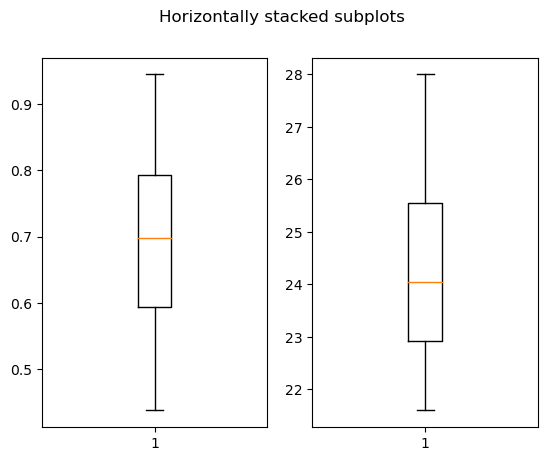

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.boxplot(conn_df['win_pct'])
ax2.boxplot(conn_df['def_reb'])

plt.show()

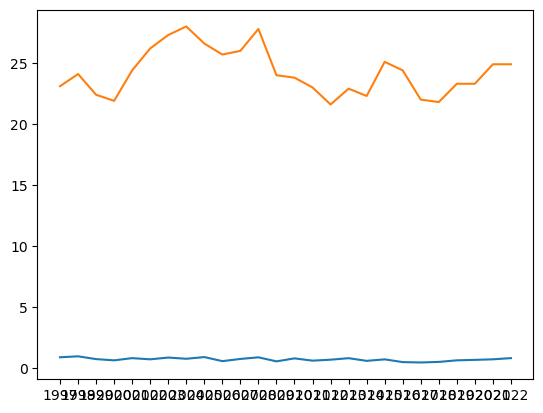

In [24]:
plt.plot(conn_win_pct.set_index('Team').T)
plt.plot(conn_def_rebounds.set_index('Team').T)

plt.show()

In [14]:
plot_df = final_four_win_prc.set_index('Team')

plot_df = plot_df.T
plot_df = plot_df.astype('float64')

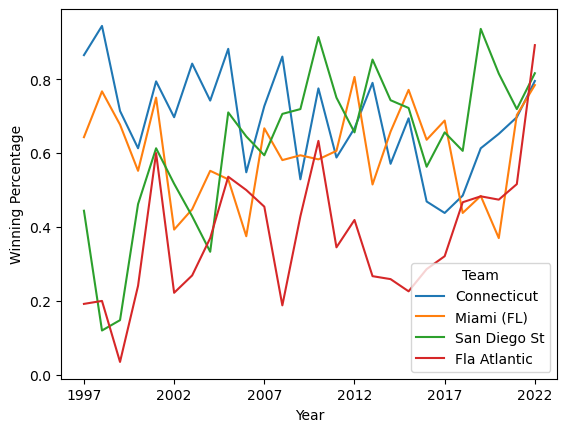

Team,Connecticut,Miami (FL),San Diego St,Fla Atlantic
count,26.000000,26.000000,26.000000,26.000000
mean,0.692000,0.598846,0.622654,0.377885
std,0.136664,0.129297,0.205907,0.180359
min,0.438000,0.370000,0.120000,0.035000
25%,0.594250,0.518500,0.528500,0.245500
50%,0.697000,0.600000,0.656000,0.357500
75%,0.793000,0.685250,0.737750,0.480750
max,0.944000,0.806000,0.936000,0.892000


In [17]:
plot_df.plot()
plt.xlabel('Year')
plt.ylabel('Winning Percentage')

plt.show()
plot_df.describe()

In [ ]:
col_list = list(plot_df.columns)

In [ ]:
plt.boxplot(plot_df)

plt.xticks(ticks = [1,2,3,4], labels = ['UCONN','MIAMI(FL)','SAN DIEGO ST','FAU'])
plt.show()

In [135]:
plot_df = final_four_win_prc.set_index('Team')

plot_df = plot_df.T
plot_df = plot_df.astype('float64')

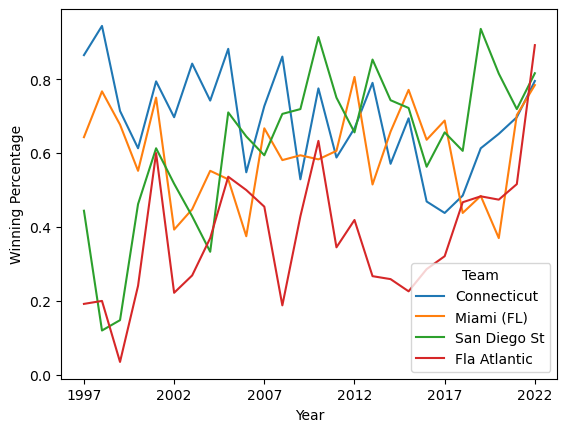

Team,Connecticut,Miami (FL),San Diego St,Fla Atlantic
count,26.000000,26.000000,26.000000,26.000000
mean,0.692000,0.598846,0.622654,0.377885
std,0.136664,0.129297,0.205907,0.180359
min,0.438000,0.370000,0.120000,0.035000
25%,0.594250,0.518500,0.528500,0.245500
50%,0.697000,0.600000,0.656000,0.357500
75%,0.793000,0.685250,0.737750,0.480750
max,0.944000,0.806000,0.936000,0.892000


In [136]:
plot_df.plot()
plt.xlabel('Year')
plt.ylabel('Winning Percentage')

plt.show()
plot_df.describe()

In [144]:
col_list = list(plot_df.columns)

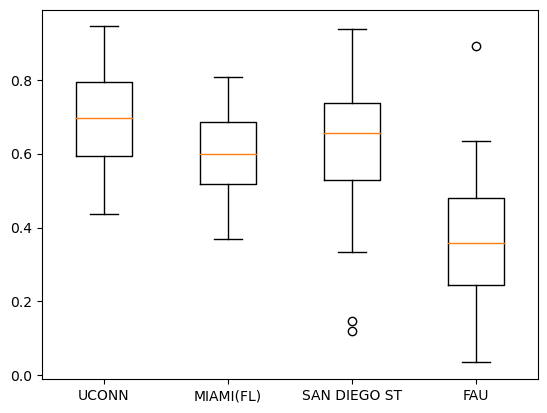

In [150]:
plt.boxplot(plot_df)

plt.xticks(ticks = [1,2,3,4], labels = ['UCONN','MIAMI(FL)','SAN DIEGO ST','FAU'])
plt.show()